<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Majewska/Drzewa_decyzyjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [73]:
data = datasets.load_iris()
X = data.data
y = data.target

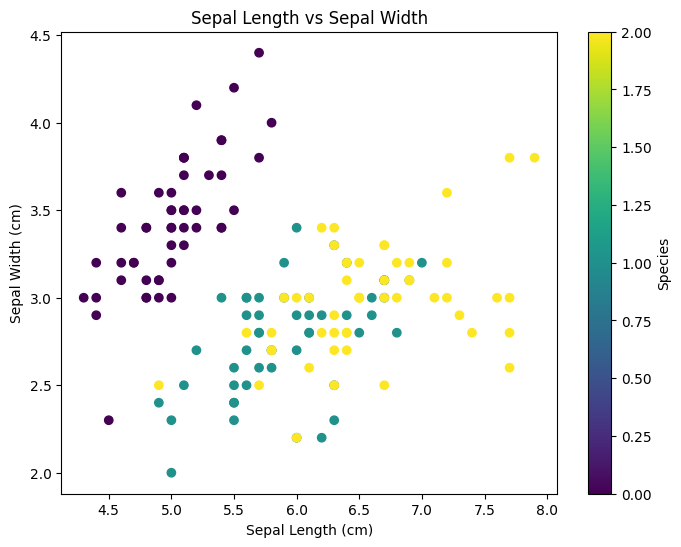

In [74]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.colorbar(label='Species')
plt.show()

In [75]:
def entropy(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities))

In [76]:
def information_gain(y, splits):
    total_entropy = entropy(y)
    split_entropy = 0
    for split in splits:
        split_entropy += (len(split) / len(y)) * entropy(split)
    return total_entropy - split_entropy

In [77]:
split_a = X[:, 3] <= 0.5
split_b = X[:, 3] <= 0.38

In [78]:
gain_a = information_gain(y, [y[split_a], y[~split_a]])
gain_b = information_gain(y, [y[split_b], y[~split_b]])

In [79]:
print("Zysk informacyjny dla podziału a):", gain_a)
print("Zysk informacyjny dla podziału b):", gain_b)

Zysk informacyjny dla podziału a): 0.864337562184764
Zysk informacyjny dla podziału b): 0.6195148513196114


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Dokładność drzewa decyzyjnego:", accuracy_dt)

Dokładność drzewa decyzyjnego: 1.0


In [82]:
random_forest = RandomForestClassifier(n_estimators=15, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Dokładność lasu losowego:", accuracy_rf)

Dokładność lasu losowego: 1.0
